### Attribute Information:

* Gender: This is the gender of a person; 0 - Other, 1 - Male, 2 - Female.
* Chain_smoker: If the person is a chain smoker or not
* Consumes_other_tobacco_products: If the person consumes other tobacco products.
* HighBP: If the person has high blood pressure or not.
* Obese: If the person is obese or not.
* Diabetes: If the person has diabetes or not.
* Metabolic_syndrome: If the person has metabolic syndrome or not
* Use_of_stimulant_drugs: If the person uses stimulant drugs or not
* Family_history: If someone in the family has cardiac issues or not.
* History_of_preeclampsia: If the person has a history of preeclampsia.
* CABG_history: If the person has a history of Coronary artery bypass surgery or not.
* Respiratory_illness: If the person has any respiratory illness.
* UnderRisk: If the person is at risk of getting a cardiac arrest or not.



**Use random_state = 1, wherever applicable.**

## Importing libraries

In [1]:
import datetime

start = datetime.datetime.now()

# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black


# To use statistical functions
import scipy.stats as stats

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

data = None

<IPython.core.display.Javascript object>

In [2]:
# Loading the dataset
data = pd.read_csv("Cardiac.csv")


<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
data.shape

(889, 13)

<IPython.core.display.Javascript object>

In [4]:
# let's view the first 5 rows of the data
data.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


<IPython.core.display.Javascript object>

In [5]:
# let's view the last 5 rows of the data
data.tail()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
884,Female,0,1,0,1,0,0,0,1,0,0,0,no
885,Male,0,1,0,1,0,0,0,1,0,0,0,no
886,Male,0,0,1,1,0,0,0,1,0,0,0,yes
887,Female,0,1,0,0,0,0,1,1,0,0,0,no
888,Male,1,1,0,1,0,0,0,1,0,0,0,yes


<IPython.core.display.Javascript object>

In [6]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

<IPython.core.display.Javascript object>

 ### Fixing the data types
    
    
`converting "objects" to "category" reduces the data space required to store the dataframe`

In [7]:
data["UnderRisk"].replace("yes", 1, inplace=True)
data["UnderRisk"].replace("no", 0, inplace=True)

data["Gender"] = data["Gender"].astype("category")
data["UnderRisk"] = data["UnderRisk"].astype("int64")

<IPython.core.display.Javascript object>

In [8]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Gender                           889 non-null    category
 1   Chain_smoker                     889 non-null    int64   
 2   Consumes_other_tobacco_products  889 non-null    int64   
 3   HighBP                           889 non-null    int64   
 4   Obese                            889 non-null    int64   
 5   Diabetes                         889 non-null    int64   
 6   Metabolic_syndrome               889 non-null    int64   
 7   Use_of_stimulant_drugs           889 non-null    int64   
 8   Family_history                   889 non-null    int64   
 9   History_of_preeclampsia          889 non-null    int64   
 10  CABG_history                     889 non-null    int64   
 11  Respiratory_illness              889 non-null    int64   
 12  UnderRis

<IPython.core.display.Javascript object>

In [9]:
# let's check for duplicate values in the data
data.duplicated().sum()

789

<IPython.core.display.Javascript object>

In [10]:
# let's check for missing values in the data
data.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Gender                            0.000
Chain_smoker                      0.000
Consumes_other_tobacco_products   0.000
HighBP                            0.000
Obese                             0.000
Diabetes                          0.000
Metabolic_syndrome                0.000
Use_of_stimulant_drugs            0.000
Family_history                    0.000
History_of_preeclampsia           0.000
CABG_history                      0.000
Respiratory_illness               0.000
UnderRisk                         0.000
dtype: float64

<IPython.core.display.Javascript object>

In [12]:
data.nunique()

Gender                             3
Chain_smoker                       2
Consumes_other_tobacco_products    2
HighBP                             2
Obese                              2
Diabetes                           2
Metabolic_syndrome                 2
Use_of_stimulant_drugs             2
Family_history                     2
History_of_preeclampsia            2
CABG_history                       2
Respiratory_illness                2
UnderRisk                          2
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.000,0.120,0.326,0.000,0.000,0.000,0.000,1.000
Consumes_other_tobacco_products,889.000,0.838,0.369,0.000,1.000,1.000,1.000,1.000
HighBP,889.000,0.087,0.281,0.000,0.000,0.000,0.000,1.000
Obese,889.000,0.919,0.273,0.000,1.000,1.000,1.000,1.000
Diabetes,889.000,0.055,0.228,0.000,0.000,0.000,0.000,1.000
Metabolic_syndrome,889.000,0.043,0.202,0.000,0.000,0.000,0.000,1.000
Use_of_stimulant_drugs,889.000,0.082,0.275,0.000,0.000,0.000,0.000,1.000
Family_history,889.000,0.926,0.262,0.000,1.000,1.000,1.000,1.000
History_of_preeclampsia,889.000,0.018,0.133,0.000,0.000,0.000,0.000,1.000
CABG_history,889.000,0.021,0.145,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

In [14]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(exclude=np.number).T

,count,unique,top,freq
Gender,889,3,Male,607


<IPython.core.display.Javascript object>

In [15]:
# Making a list of all catrgorical variables
cat_col = data.columns

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Male      607
Female    256
Other      26
Name: Gender, dtype: int64
----------------------------------------
0    782
1    107
Name: Chain_smoker, dtype: int64
----------------------------------------
1    745
0    144
Name: Consumes_other_tobacco_products, dtype: int64
----------------------------------------
0    812
1     77
Name: HighBP, dtype: int64
----------------------------------------
1    817
0     72
Name: Obese, dtype: int64
----------------------------------------
0    840
1     49
Name: Diabetes, dtype: int64
----------------------------------------
0    851
1     38
Name: Metabolic_syndrome, dtype: int64
----------------------------------------
0    816
1     73
Name: Use_of_stimulant_drugs, dtype: int64
----------------------------------------
1    823
0     66
Name: Family_history, dtype: int64
----------------------------------------
0    873
1     16
Name: History_of_preeclampsia, dtype: int64
----------------------------------------
0    870
1     19
Name: CABG_hi

<IPython.core.display.Javascript object>

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [19]:
data.corr().T

,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
Chain_smoker,1.000,-0.138,0.083,0.059,-0.044,-0.010,-0.060,-0.001,0.054,0.065,-0.029,-0.142
Consumes_other_tobacco_products,-0.138,1.000,-0.082,0.194,0.053,-0.360,-0.191,0.434,0.060,-0.041,0.012,0.065
HighBP,0.083,-0.082,1.000,0.033,-0.057,-0.045,-0.034,0.072,-0.012,-0.018,0.056,0.132
Obese,0.059,0.194,0.033,1.000,-0.001,-0.691,-0.993,0.451,0.040,0.015,0.008,0.024
Diabetes,-0.044,0.053,-0.057,-0.001,1.000,0.022,-0.000,-0.082,0.190,0.067,-0.017,-0.018
Metabolic_syndrome,-0.010,-0.360,-0.045,-0.691,0.022,1.000,0.686,-0.661,-0.029,-0.031,-0.039,-0.083
Use_of_stimulant_drugs,-0.060,-0.191,-0.034,-0.993,-0.000,0.686,1.000,-0.447,-0.040,-0.016,-0.009,-0.026
Family_history,-0.001,0.434,0.072,0.451,-0.082,-0.661,-0.447,1.000,0.006,0.042,0.052,0.148
History_of_preeclampsia,0.054,0.060,-0.012,0.040,0.190,-0.029,-0.040,0.006,1.000,-0.020,-0.025,-0.071
CABG_history,0.065,-0.041,-0.018,0.015,0.067,-0.031,-0.016,0.042,-0.020,1.000,-0.027,-0.077


<IPython.core.display.Javascript object>

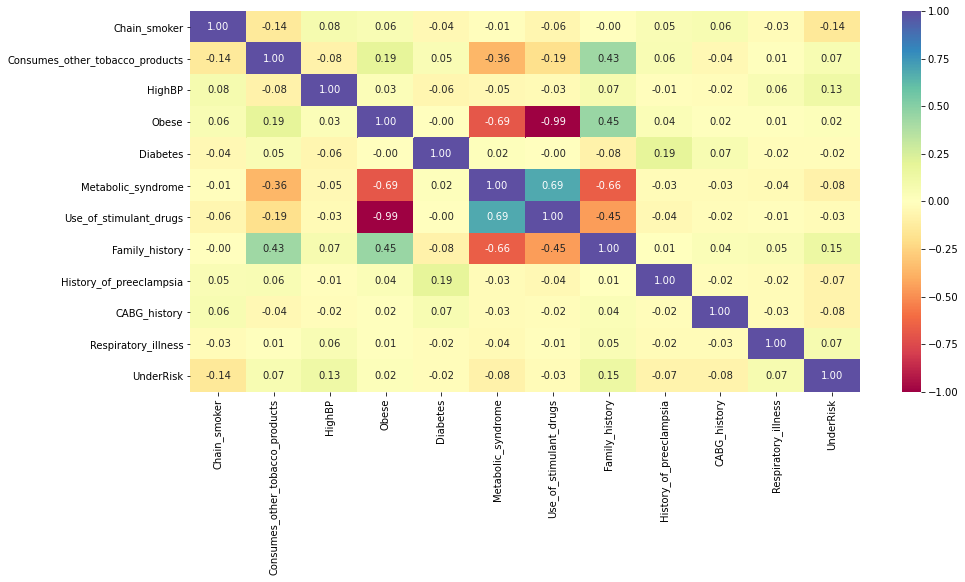

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

In [21]:
"""
sns.pairplot(data=data, diag_kind="kde", hue="UnderRisk")
plt.show()
"""

'\nsns.pairplot(data=data, diag_kind="kde", hue="UnderRisk")\nplt.show()\n'

<IPython.core.display.Javascript object>

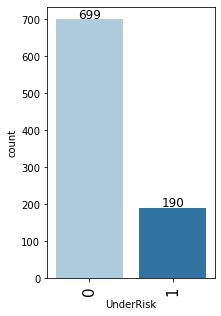

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "UnderRisk")

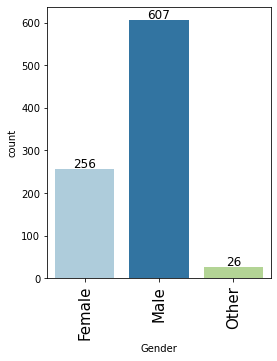

UnderRisk    0    1  All
Gender                  
All        699  190  889
Male       461  146  607
Female     216   40  256
Other       22    4   26
------------------------------------------------------------------------------------------------------------------------


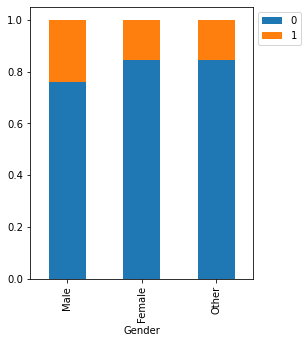

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "Gender")
stacked_barplot(data, "Gender", "UnderRisk")

UnderRisk       0    1  All
Chain_smoker               
All           699  190  889
0             598  184  782
1             101    6  107
------------------------------------------------------------------------------------------------------------------------


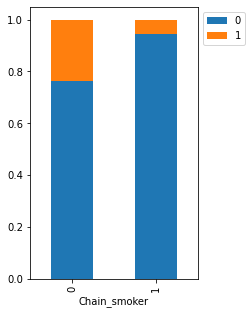

UnderRisk                          0    1  All
Consumes_other_tobacco_products               
All                              699  190  889
1                                577  168  745
0                                122   22  144
------------------------------------------------------------------------------------------------------------------------


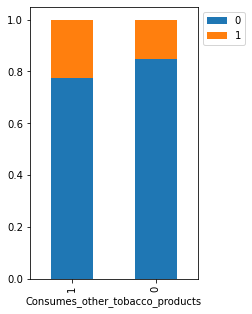

<IPython.core.display.Javascript object>

In [24]:
stacked_barplot(data, "Chain_smoker", "UnderRisk")
stacked_barplot(data, "Consumes_other_tobacco_products", "UnderRisk")


UnderRisk    0    1  All
HighBP                  
All        699  190  889
0          652  160  812
1           47   30   77
------------------------------------------------------------------------------------------------------------------------


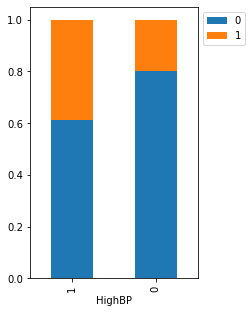

UnderRisk    0    1  All
Obese                   
All        699  190  889
1          640  177  817
0           59   13   72
------------------------------------------------------------------------------------------------------------------------


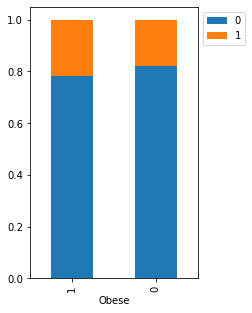

<IPython.core.display.Javascript object>

In [25]:
stacked_barplot(data, "HighBP", "UnderRisk")
stacked_barplot(data, "Obese", "UnderRisk")


UnderRisk    0    1  All
Diabetes                
All        699  190  889
0          659  181  840
1           40    9   49
------------------------------------------------------------------------------------------------------------------------


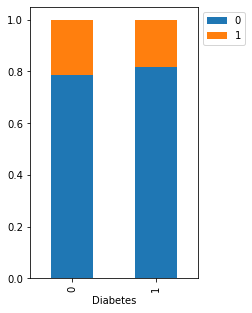

UnderRisk             0    1  All
Metabolic_syndrome               
All                 699  190  889
0                   663  188  851
1                    36    2   38
------------------------------------------------------------------------------------------------------------------------


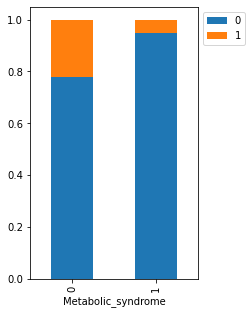

<IPython.core.display.Javascript object>

In [26]:
stacked_barplot(data, "Diabetes", "UnderRisk")
stacked_barplot(data, "Metabolic_syndrome", "UnderRisk")


UnderRisk                 0    1  All
Use_of_stimulant_drugs               
All                     699  190  889
0                       639  177  816
1                        60   13   73
------------------------------------------------------------------------------------------------------------------------


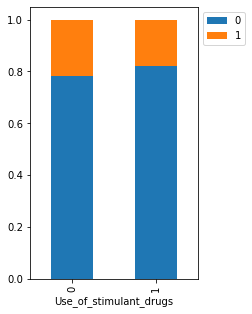

UnderRisk                  0    1  All
History_of_preeclampsia               
0                        683  190  873
All                      699  190  889
1                         16    0   16
------------------------------------------------------------------------------------------------------------------------


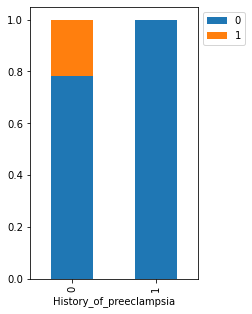

<IPython.core.display.Javascript object>

In [27]:
stacked_barplot(data, "Use_of_stimulant_drugs", "UnderRisk")
stacked_barplot(data, "History_of_preeclampsia", "UnderRisk")


UnderRisk       0    1  All
CABG_history               
0             680  190  870
All           699  190  889
1              19    0   19
------------------------------------------------------------------------------------------------------------------------


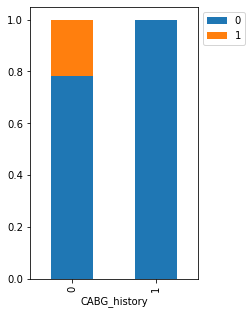

UnderRisk              0    1  All
Respiratory_illness               
All                  699  190  889
0                    681  179  860
1                     18   11   29
------------------------------------------------------------------------------------------------------------------------


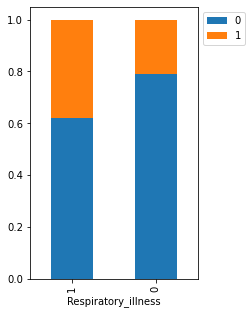

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(data, "CABG_history", "UnderRisk")
stacked_barplot(data, "Respiratory_illness", "UnderRisk")

In [90]:
X = data.drop(["UnderRisk"], axis=1)
Y = data["UnderRisk"]

print(f"X shape {X.shape}")

X shape (889, 12)


<IPython.core.display.Javascript object>

In [91]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
print(f"X shape {X.shape}")
X.head()

X shape (889, 13)


,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,Gender_Male,Gender_Other
0,1,1,0,1,0,0,0,1,0,0,0,1,0
1,0,1,0,1,0,0,0,1,0,0,0,1,0
2,0,1,0,1,0,0,0,1,0,0,0,1,0
3,0,1,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [159]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(533, 13) (178, 13) (178, 13)


<IPython.core.display.Javascript object>

In [160]:
print("Number of rows in train data =", X_train.shape)
print("Number of rows in validation data =", X_val.shape)
print("Number of rows in test data =", X_test.shape)

Number of rows in train data = (533, 13)
Number of rows in validation data = (178, 13)
Number of rows in test data = (178, 13)


<IPython.core.display.Javascript object>

In [33]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(0    419
 1    114
 Name: UnderRisk, dtype: int64,
 0    140
 1     38
 Name: UnderRisk, dtype: int64,
 0    140
 1     38
 Name: UnderRisk, dtype: int64)

<IPython.core.display.Javascript object>

In [104]:
print("Shape of train data =", X_train.shape)
print("Shape of val data =", X_val.shape)
print("Shape of test data =", X_test.shape)
print("Shape of Y train data =", y_train.shape)
print("Shape of Y val data =", y_val.shape)
print("Shape of Y test data =", y_test.shape)


Shape of train data = (533, 13)
Shape of val data = (178, 13)
Shape of test data = (178, 13)
Shape of Y train data = (533,)
Shape of Y val data = (178,)
Shape of Y test data = (178,)


<IPython.core.display.Javascript object>

## Building the model

In [35]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(
    model, predictors, target, name="", type_run=""
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Model": name,
            "Data": type_run,
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [36]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression 

In [96]:
lr3 = LogisticRegression(random_state=1)
lr3.fit(X_train, y_train)
train_perf = model_performance_classification_sklearn(
    lr3, X_train, y_train, "lr3", "train"
)
train_perf

,Model,Data,Accuracy,Recall,Precision,F1
0,lr3,train,0.788,0.035,0.571,0.066


<IPython.core.display.Javascript object>

In [98]:
##over sampling 

print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))


lr4 = LogisticRegression(random_state=1)
lr4.fit(X_train_over, y_train_over)
train_perf4 = model_performance_classification_sklearn(
    lr4, X_train_over, y_train_over, "lr4", "train"
)
train_perf4


Before UpSampling, counts of label 'Yes': 114
Before UpSampling, counts of label 'No': 419 

After UpSampling, counts of label 'Yes': 419
After UpSampling, counts of label 'No': 419 

After UpSampling, the shape of train_X: (838, 13)
After UpSampling, the shape of train_y: (838,) 



,Model,Data,Accuracy,Recall,Precision,F1
0,lr4,train,0.673,0.773,0.644,0.703


<IPython.core.display.Javascript object>

In [101]:
##bagging classifier 

bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train_over,y_train_over)

train_perf5 = model_performance_classification_sklearn(
    bagging, X_train_over, y_train_over, "bagging", "train"
)
train_perf5






,Model,Data,Accuracy,Recall,Precision,F1
0,bagging,train,0.699,0.790,0.669,0.724


<IPython.core.display.Javascript object>

In [113]:
# creating confusion matrix


<IPython.core.display.Javascript object>

In [102]:
train_perf6 = model_performance_classification_sklearn(
    bagging, X_val, y_val, "bagging", "val"
)
train_perf6

,Model,Data,Accuracy,Recall,Precision,F1
0,bagging,val,0.573,0.605,0.274,0.377


<IPython.core.display.Javascript object>

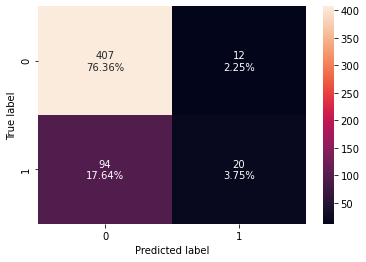

<IPython.core.display.Javascript object>

In [161]:
#random forest


rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

# creating confusion matrix
confusion_matrix_sklearn(rf, X_train, y_train)


In [115]:
train_perf_rf1 = model_performance_classification_sklearn(
    rf, X_train, y_train, "rf", "trian"
)
train_perf_rf1

,Model,Data,Accuracy,Recall,Precision,F1
0,rf,trian,0.801,0.175,0.625,0.274


<IPython.core.display.Javascript object>

In [162]:
## Cross validations 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("lr", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=5
    )
    results.append(cv_result)
    names.append(name)
    print("{}: Mean Score : {}".format(name, cv_result.mean() * 100))




Cross-Validation Performance:

Bagging: Mean Score : 79.48938611589213
Random forest: Mean Score : 79.72748135398739
lr: Mean Score : 76.85025817555938
dtree: Mean Score : 78.77510040160642


<IPython.core.display.Javascript object>

In [121]:
## Cross validations 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("lr", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance with kfold:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: Mean Score : {}".format(name, cv_result.mean() * 100))




Cross-Validation Performance with kfold:

Bagging: Mean Score : 78.2788296041308
Random forest: Mean Score : 78.04360298336202
lr: Mean Score : 76.61503155479059
dtree: Mean Score : 77.80263912794034


<IPython.core.display.Javascript object>

In [129]:
##Adaboost Classifier - Tuning with random search


model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {"n_estimators": np.arange(10, 110, 10),
 "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
 "base_estimator": [
 DecisionTreeClassifier(max_depth=1, random_state=1),
 DecisionTreeClassifier(max_depth=2, random_state=1),
 DecisionTreeClassifier(max_depth=3, random_state=1)]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv1 = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring=scorer,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv1.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv1.best_params_, randomized_cv1.best_score_
    )
)



Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9642857142857142:


<IPython.core.display.Javascript object>

In [153]:
## understmping data

rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, the shape of train_X: {}".format(X_train.shape))
print("Before Under Sampling, the shape of train_y: {} \n".format(y_train.shape))

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, the shape of train_X: (533, 13)
Before Under Sampling, the shape of train_y: (533,) 

Before Under Sampling, counts of label 'Yes': 114
Before Under Sampling, counts of label 'No': 419 

After Under Sampling, counts of label 'Yes': 114
After Under Sampling, counts of label 'No': 114 

After Under Sampling, the shape of train_X: (228, 13)
After Under Sampling, the shape of train_y: (228,) 



<IPython.core.display.Javascript object>

In [163]:
# AdaBoostClassifier


ada1 = RandomForestClassifier(random_state=1)
ada1.fit(X_train_un, y_train_un)


train_perf_ada1 = model_performance_classification_sklearn(
    ada1, X_train_un, y_train_un, "ada - un", "trian"
)
train_perf_ada1

,Model,Data,Accuracy,Recall,Precision,F1
0,ada - un,trian,0.732,0.877,0.680,0.766


<IPython.core.display.Javascript object>

In [164]:
ada1.score(X_train_un, y_train_un)

0.7324561403508771

<IPython.core.display.Javascript object>

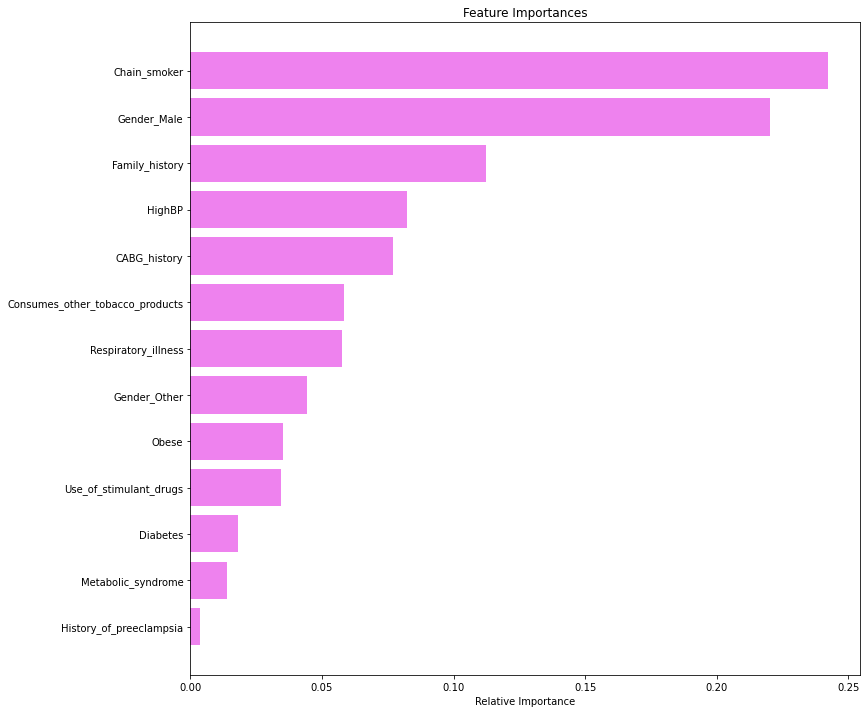

<IPython.core.display.Javascript object>

In [165]:
## feature importance from undersampled data 


feature_names = X_train_un.columns
importances = ada1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [166]:
ada2 = RandomForestClassifier(random_state=1)
ada2.fit(X_train_over, y_train_over)


train_perf_ada2 = model_performance_classification_sklearn(
    ada2, X_train_over, y_train_over, "ada - over", "trian"
)
train_perf_ada2


,Model,Data,Accuracy,Recall,Precision,F1
0,ada - over,trian,0.699,0.811,0.663,0.730


<IPython.core.display.Javascript object>

In [167]:
ada2.score(X_train_over, y_train_over)

0.6992840095465394

<IPython.core.display.Javascript object>

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

<IPython.core.display.Javascript object>

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

Accuracy: 1.779% STD:(2.179%)


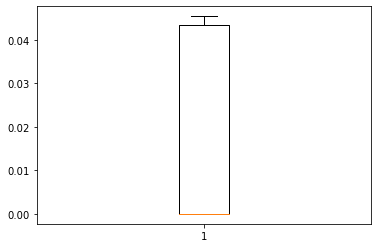

<IPython.core.display.Javascript object>

In [38]:
lr1 = LogisticRegression(random_state=1)
lr1.fit(X_train, y_train)
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr1, X=X_train, y=y_train, scoring=scoring, cv=kfold
)

print(
    "Accuracy: %.3f%% STD:(%.3f%%)"
    % (cv_result_bfr.mean() * 100.0, cv_result_bfr.std() * 100.0)
)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [39]:
# Calculating different metrics on train set
train_perf = model_performance_classification_sklearn(
    lr1, X_train, y_train, "default lr", "train"
)

val_perf = model_performance_classification_sklearn(
    lr1, X_val, y_val, "default lr", "val"
)

pd.concat([train_perf, val_perf], sort=False)


,Model,Data,Accuracy,Recall,Precision,F1
0,default lr,train,0.788,0.035,0.571,0.066
0,default lr,val,0.770,0.026,0.200,0.047


<IPython.core.display.Javascript object>

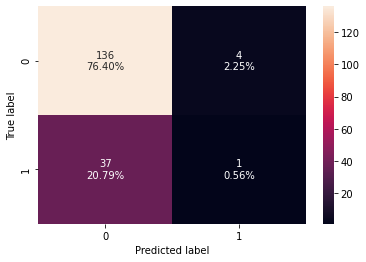

<IPython.core.display.Javascript object>

In [40]:
# creating confusion matrix
confusion_matrix_sklearn(lr1, X_val, y_val)

### Oversampling train data using SMOTE

In [41]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 114
Before UpSampling, counts of label 'No': 419 

After UpSampling, counts of label 'Yes': 419
After UpSampling, counts of label 'No': 419 

After UpSampling, the shape of train_X: (838, 13)
After UpSampling, the shape of train_y: (838,) 



<IPython.core.display.Javascript object>

### Logistic Regression on oversampled data

In [42]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

Accuracy: 1.779% STD:(4.597%)


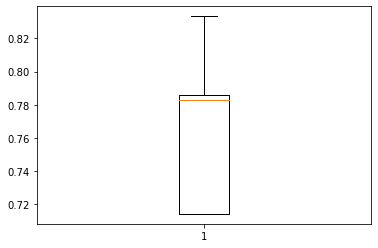

<IPython.core.display.Javascript object>

In [43]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)

print(
    "Accuracy: %.3f%% STD:(%.3f%%)"
    % (cv_result_bfr.mean() * 100.0, cv_result_over.std() * 100.0)
)


# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [44]:
# Calculating different metrics on train set
train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over, "lr with over sampled", "train"
)

val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val, "lr with over sampled", "val"
)

pd.concat([train_perf, val_perf], sort=False)


,Model,Data,Accuracy,Recall,Precision,F1
0,lr with over sampled,train,0.673,0.773,0.644,0.703
0,lr with over sampled,val,0.601,0.632,0.296,0.403


<IPython.core.display.Javascript object>

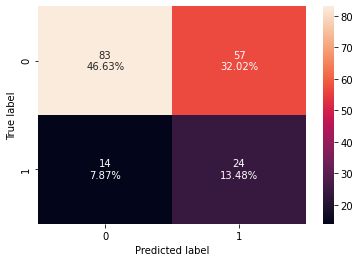

<IPython.core.display.Javascript object>

In [45]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

### Undersampling train data using RandomUnderSampler

In [46]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 114
Before Under Sampling, counts of label 'No': 419 

After Under Sampling, counts of label 'Yes': 114
After Under Sampling, counts of label 'No': 114 

After Under Sampling, the shape of train_X: (228, 13)
After Under Sampling, the shape of train_y: (228,) 



<IPython.core.display.Javascript object>

In [47]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

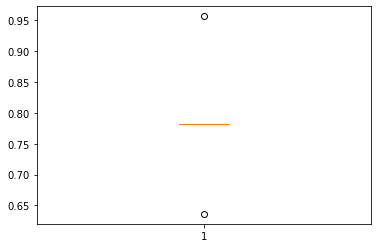

<IPython.core.display.Javascript object>

In [48]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [49]:
# Calculating different metrics on train set
train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un, "lr with under sampled", "train"
)

val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val, "lr with under sampled", "val"
)

pd.concat([train_perf, val_perf], sort=False)


,Model,Data,Accuracy,Recall,Precision,F1
0,lr with under sampled,train,0.706,0.842,0.662,0.741
0,lr with under sampled,val,0.573,0.684,0.289,0.406


<IPython.core.display.Javascript object>

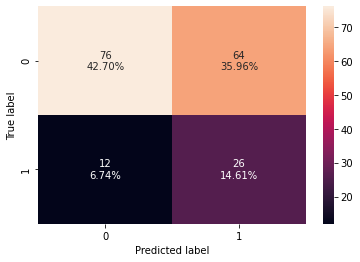

<IPython.core.display.Javascript object>

In [50]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

### Regularization

In [51]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.30000000000000004, random_state=1, solver='saga')

<IPython.core.display.Javascript object>

In [52]:
# Calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_train_perf

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.671,0.773,0.642,0.701


<IPython.core.display.Javascript object>

In [53]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)
print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.601,0.632,0.296,0.403


<IPython.core.display.Javascript object>

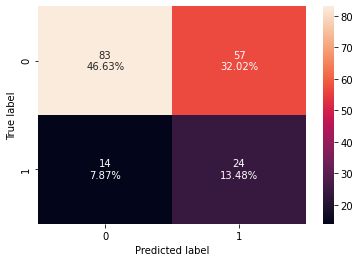

<IPython.core.display.Javascript object>

In [54]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator, X_val, y_val)

### Finding the coefficients

In [55]:
# let us check the coefficients and intercept of the model (lin. and log. reg. sklearn)

coef_df = pd.DataFrame(
    np.append(lr1.coef_, lr1.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,Gender_Male,Gender_Other,Intercept
Coefficients,-1.779,-0.173,0.759,-0.160,-0.340,-0.489,0.019,1.836,-0.986,-1.055,0.463,0.898,0.363,-3.324


<IPython.core.display.Javascript object>

### Multiple Models

In [56]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: Mean Score : {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: Validation Score {}".format(name, scores * 100))


Cross-Validation Performance:

Bagging: Mean Score : 14.94071146245059
Random forest: Mean Score : 12.33201581027668
GBM: Mean Score : 7.865612648221345
Adaboost: Mean Score : 6.996047430830039
Xgboost: Mean Score : 2.648221343873518
dtree: Mean Score : 3.517786561264822

Validation Performance:

Bagging: Validation Score 13.157894736842104
Random forest: Validation Score 10.526315789473683
GBM: Validation Score 5.263157894736842
Adaboost: Validation Score 7.894736842105263
Xgboost: Validation Score 5.263157894736842
dtree: Validation Score 10.526315789473683


<IPython.core.display.Javascript object>

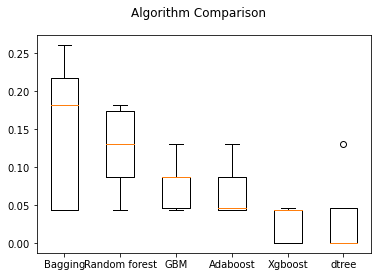

<IPython.core.display.Javascript object>

In [57]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

# Hyperparameter Tuning

## Decision Tree

### GridSearchCV

In [58]:
# Creating pipeline
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15, 25],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 25} 
Score: 0.09683794466403162


<IPython.core.display.Javascript object>

In [59]:
dtree_tuned1 = grid_cv.best_estimator_
# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=25,
                       random_state=1)

<IPython.core.display.Javascript object>

In [60]:
# Calculating different metrics on train set
dtree_grid_train = model_performance_classification_sklearn(
    dtree_tuned1, X_train, y_train
)
print("Training performance:")
dtree_grid_train

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.795,0.140,0.593,0.227


<IPython.core.display.Javascript object>

In [61]:
# Calculating different metrics on validation set
dtree_grid_val = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance:")
dtree_grid_val

Validation performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.764,0.105,0.333,0.160


<IPython.core.display.Javascript object>

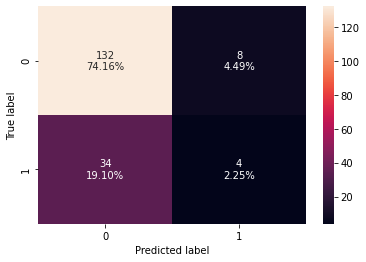

<IPython.core.display.Javascript object>

In [62]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

### RandomizedSearchCV

In [63]:
# Creating pipeline
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_split': 7, 'max_depth': 4, 'criterion': 'entropy'} with CV score=0.05217391304347826:


<IPython.core.display.Javascript object>

In [64]:
# Creating new pipeline with best parameters
dtree_tuned2 = randomized_cv.best_estimator_
# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [65]:
# Calculating different metrics on train set
dtree_random_train = model_performance_classification_sklearn(
    dtree_tuned2, X_train, y_train
)
print("Training performance:")
dtree_random_train

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.790,0.018,1.000,0.034


<IPython.core.display.Javascript object>

In [66]:
# Calculating different metrics on validation set
dtree_random_val = model_performance_classification_sklearn(dtree_tuned2, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.775,0.026,0.250,0.048


<IPython.core.display.Javascript object>

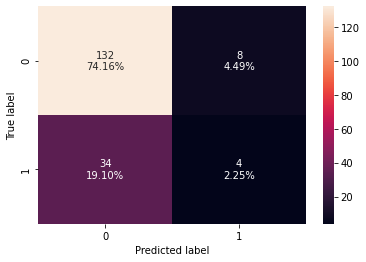

<IPython.core.display.Javascript object>

In [67]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

In [68]:
print("Shape of train data =", X_train.shape)
print("Shape of val data =", X_val.shape)
print("Shape of test data =", X_test.shape)
print("Shape of Y train data =", y_train.shape)
print("Shape of Y val data =", y_val.shape)
print("Shape of Y test data =", y_test.shape)




Shape of train data = (533, 13)
Shape of val data = (178, 13)
Shape of test data = (178, 13)
Shape of Y train data = (533,)
Shape of Y val data = (178,)
Shape of Y test data = (178,)


<IPython.core.display.Javascript object>

## XGBoost

### GridSearchCV

In [69]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(5,20,10),
            'scale_pos_weight':[2,5],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,5],
            'subsample':[0.8,1],
            'max_depth':np.arange(1,20,5),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 4)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5, 'reg_lambda': 5, 'scale_pos_weight': 5, 'subsample': 0.8} with CV score=0.9826086956521738:
CPU times: user 4.67 s, sys: 521 ms, total: 5.19 s
Wall time: 3min


<IPython.core.display.Javascript object>

In [70]:
# building model with best parameters
xgb_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=5, n_jobs=10,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=5, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [71]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_grid_train

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.394,0.982,0.259,0.410


<IPython.core.display.Javascript object>

In [72]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.371,0.974,0.250,0.398


<IPython.core.display.Javascript object>

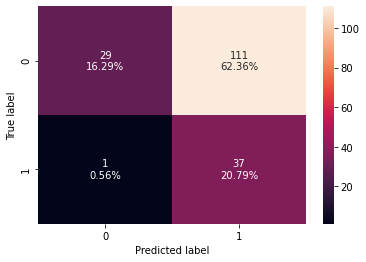

<IPython.core.display.Javascript object>

In [73]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

In [74]:
print("Shape of train data =", X_train.shape)
print("Shape of val data =", X_val.shape)
print("Shape of test data =", X_test.shape)
print("Shape of Y train data =", y_train.shape)
print("Shape of Y val data =", y_val.shape)
print("Shape of Y test data =", y_test.shape)



Shape of train data = (533, 13)
Shape of val data = (178, 13)
Shape of test data = (178, 13)
Shape of Y train data = (533,)
Shape of Y val data = (178,)
Shape of Y test data = (178,)


<IPython.core.display.Javascript object>

### RandomizedSearchCV

In [75]:
%%time

# Creating pipeline
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)



Best parameters are {'min_samples_split': 7, 'max_depth': 4, 'criterion': 'entropy'} with CV score=0.05217391304347826:
CPU times: user 471 ms, sys: 110 ms, total: 582 ms
Wall time: 273 ms


<IPython.core.display.Javascript object>

In [76]:
# building model with best parameters
xgb_tuned2 = randomized_cv.best_estimator_
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [77]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.790,0.018,1.000,0.034


<IPython.core.display.Javascript object>

In [78]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.775,0.026,0.250,0.048


<IPython.core.display.Javascript object>

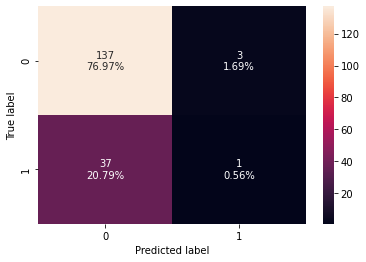

<IPython.core.display.Javascript object>

In [79]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

### Comparing models from GridsearchCV and RandomisedsearchCV

In [80]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_grid_train.T,
        dtree_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Model,,,,
Data,,,,
Accuracy,0.795,0.790,0.394,0.790
Recall,0.140,0.018,0.982,0.018
Precision,0.593,1.000,0.259,1.000
F1,0.227,0.034,0.410,0.034


<IPython.core.display.Javascript object>

In [81]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [dtree_grid_val.T, dtree_random_val.T, xgboost_grid_val.T, xgboost_random_val.T,],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree Tuned with Grid search",
    "Decision Tree Tuned with Random search",
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random Search",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree Tuned with Grid search,Decision Tree Tuned with Random search,Xgboost Tuned with Grid search,Xgboost Tuned with Random Search
Model,,,,
Data,,,,
Accuracy,0.764,0.775,0.371,0.775
Recall,0.105,0.026,0.974,0.026
Precision,0.333,0.250,0.250,0.250
F1,0.160,0.048,0.398,0.048


<IPython.core.display.Javascript object>

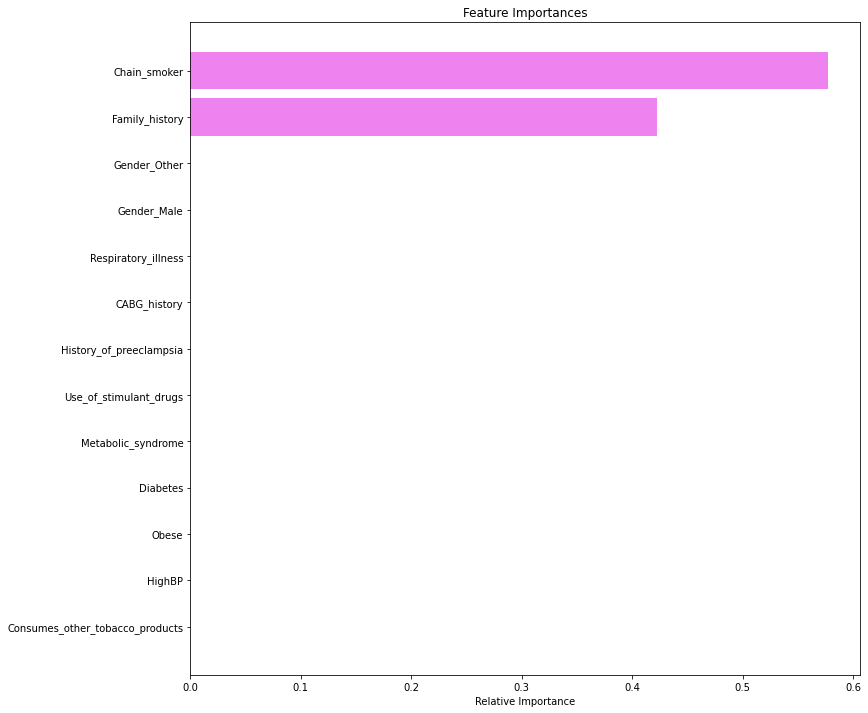

<IPython.core.display.Javascript object>

In [82]:
feature_names = X_train.columns
importances = xgb_tuned1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines for productionizing the model

In [83]:
# creating a list of numerical variables
numerical_features = [
    "Chain_smoker",
    "Consumes_other_tobacco_products",
    "HighBP",
    "Obese",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a list of categorical variables
categorical_features = ["Gender"]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

<IPython.core.display.Javascript object>

In [84]:
X = data.drop(["UnderRisk"], axis=1)
Y = data["UnderRisk"]

print(f"X shape {X.shape}")

X shape (889, 12)


<IPython.core.display.Javascript object>

In [85]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(622, 12) (267, 12)


<IPython.core.display.Javascript object>

In [86]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=0.8,
                learning_rate=0.01,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=5,
                max_depth=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Chain_smoker',
                                                   'Consumes_other_tobacco_products',
                                                   'HighBP', 'Obese']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                     

<IPython.core.display.Javascript object>

In [87]:
xgboost_random_val = model_performance_classification_sklearn(model, X_test, y_test)
print("Testing performance:")
xgboost_random_val

Testing performance:


,Model,Data,Accuracy,Recall,Precision,F1
0,,,0.375,0.930,0.245,0.388


<IPython.core.display.Javascript object>